[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


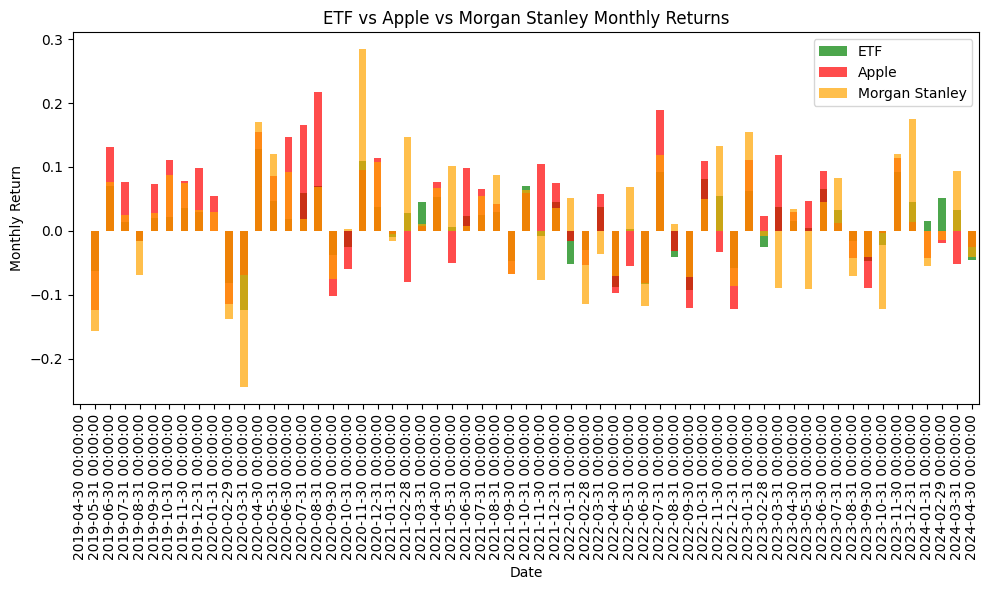

[*********************100%%**********************]  7 of 7 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No data found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


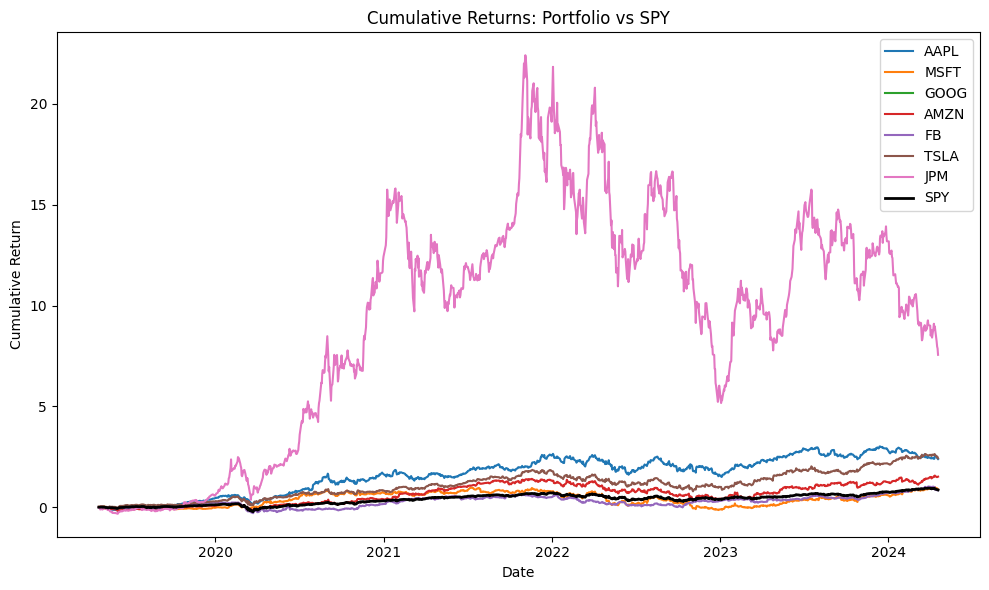

In [36]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime as dt
import random

# Setting display options for convenience
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 1000)

# Download historical data for VOO ETF
spy = yf.download('VOO', period='5y')

# Calculate price returns
price_returns = spy.pct_change()

# Calculate price momentum with a 12-month rolling window
window = 12
price_momentum = price_returns.rolling(window).sum()

# Calculate mean and standard deviation for the z-score calculation
mean_factor = price_momentum.mean()
std_factor = price_momentum.std()

# Calculate z-scores
z_score = (price_momentum - mean_factor) / std_factor

# Define long and short baskets based on z-scores
long_basket = z_score[z_score['Adj Close'] >= z_score['Adj Close'].mean()]
short_basket = z_score[z_score['Adj Close'] < z_score['Adj Close'].mean()]

# Strategy definition using moving average
def my_strategy(data):
    data['ma_50'] = data['Adj Close'].rolling(window=50).mean()
    data['position'] = 0
    data.loc[data['Adj Close'] > data['ma_50'], 'position'] = 1
    data.loc[data['Adj Close'] < data['ma_50'], 'position'] = -1
    return data

# Apply strategy to ETF and individual stock data
etf_data = yf.download('VOO', period='5y')['Adj Close'].to_frame()
apple_data = yf.download('AAPL', period='5y')['Adj Close'].to_frame()
ms_data = yf.download('MS', period='5y')['Adj Close'].to_frame()

etf_strategy = my_strategy(etf_data.copy())
apple_strategy = my_strategy(apple_data.copy())
ms_strategy = my_strategy(ms_data.copy())

# Calculate monthly returns
etf_monthly_returns = etf_strategy['Adj Close'].resample('M').ffill().pct_change()
apple_monthly_returns = apple_strategy['Adj Close'].resample('M').ffill().pct_change()
ms_monthly_returns = ms_strategy['Adj Close'].resample('M').ffill().pct_change()

# Plot monthly returns comparison
fig, ax = plt.subplots(figsize=(10, 6))
etf_monthly_returns.plot(kind='bar', ax=ax, color='green', alpha=0.7)
apple_monthly_returns.plot(kind='bar', ax=ax, color='red', alpha=0.7)
ms_monthly_returns.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Return')
ax.set_title('ETF vs Apple vs Morgan Stanley Monthly Returns')
ax.legend(['ETF', 'Apple', 'Morgan Stanley'])
plt.tight_layout()
plt.show()

# Download and compare portfolio and ETF cumulative returns
portfolio_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'FB', 'TSLA', 'JPM']
portfolio_data = yf.download(portfolio_tickers, period='5y')['Adj Close']
etf_data = yf.download('SPY', period='5y')['Adj Close']

portfolio_cumulative_returns = (portfolio_data.pct_change() + 1).cumprod() - 1
etf_cumulative_returns = (etf_data.pct_change() + 1).cumprod() - 1

# Plot cumulative returns
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(portfolio_cumulative_returns, label=portfolio_tickers)
ax.plot(etf_cumulative_returns, label='SPY', color='black', linewidth=2.0)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title('Cumulative Returns: Portfolio vs SPY')
ax.legend()
plt.tight_layout()
plt.show()